In [46]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [32]:
causes = pd.read_csv("collisions_cleaned.csv", low_memory=False)

In [33]:
causes = causes[causes.columns[18:23]]

In [34]:
causes = causes.apply(pd.Series.value_counts)

In [35]:
causes['CONTRIBUTING FACTOR VEHICLE 1'] = causes['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 2'] = causes['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 3'] = causes['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 4'] = causes['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 5'] = causes['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='NaN', value=0)

In [36]:
causes

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
Accelerator Defective,340,48,7.0,1.0,0.0
Aggressive Driving/Road Rage,2533,647,25.0,7.0,1.0
Alcohol Involvement,6420,792,105.0,35.0,20.0
Animals Action,411,58,6.0,1.0,0.0
Backing Unsafely,22985,4151,89.0,14.0,2.0
Brakes Defective,1971,226,25.0,7.0,3.0
Cell Phone (hand-held),97,23,0.0,0.0,0.0
Cell Phone (hands-free),175,29,1.0,0.0,0.0
Driver Inattention/Distraction,104499,30703,842.0,141.0,32.0
Driver Inexperience,9886,3145,109.0,24.0,8.0


In [37]:
causes = causes['CONTRIBUTING FACTOR VEHICLE 1'] + causes['CONTRIBUTING FACTOR VEHICLE 2'] + causes['CONTRIBUTING FACTOR VEHICLE 3'] + causes['CONTRIBUTING FACTOR VEHICLE 4'] + causes['CONTRIBUTING FACTOR VEHICLE 5']

In [38]:
causes

Accelerator Defective                                        396.0
Aggressive Driving/Road Rage                                3213.0
Alcohol Involvement                                         7372.0
Animals Action                                               476.0
Backing Unsafely                                           27241.0
Brakes Defective                                            2232.0
Cell Phone (hand-held)                                       120.0
Cell Phone (hands-free)                                      205.0
Driver Inattention/Distraction                            136217.0
Driver Inexperience                                        13172.0
Driverless/Runaway Vehicle                                   122.0
Drugs (Illegal)                                              545.0
Failure to Keep Right                                       1947.0
Failure to Yield Right-of-Way                              44176.0
Fatigued/Drowsy                                            494

In [39]:
causes = causes.drop(causes.index[45])

In [40]:
causes

Accelerator Defective                                       396.0
Aggressive Driving/Road Rage                               3213.0
Alcohol Involvement                                        7372.0
Animals Action                                              476.0
Backing Unsafely                                          27241.0
Brakes Defective                                           2232.0
Cell Phone (hand-held)                                      120.0
Cell Phone (hands-free)                                     205.0
Driver Inattention/Distraction                           136217.0
Driver Inexperience                                       13172.0
Driverless/Runaway Vehicle                                  122.0
Drugs (Illegal)                                             545.0
Failure to Keep Right                                      1947.0
Failure to Yield Right-of-Way                             44176.0
Fatigued/Drowsy                                           49446.0
Fell Aslee

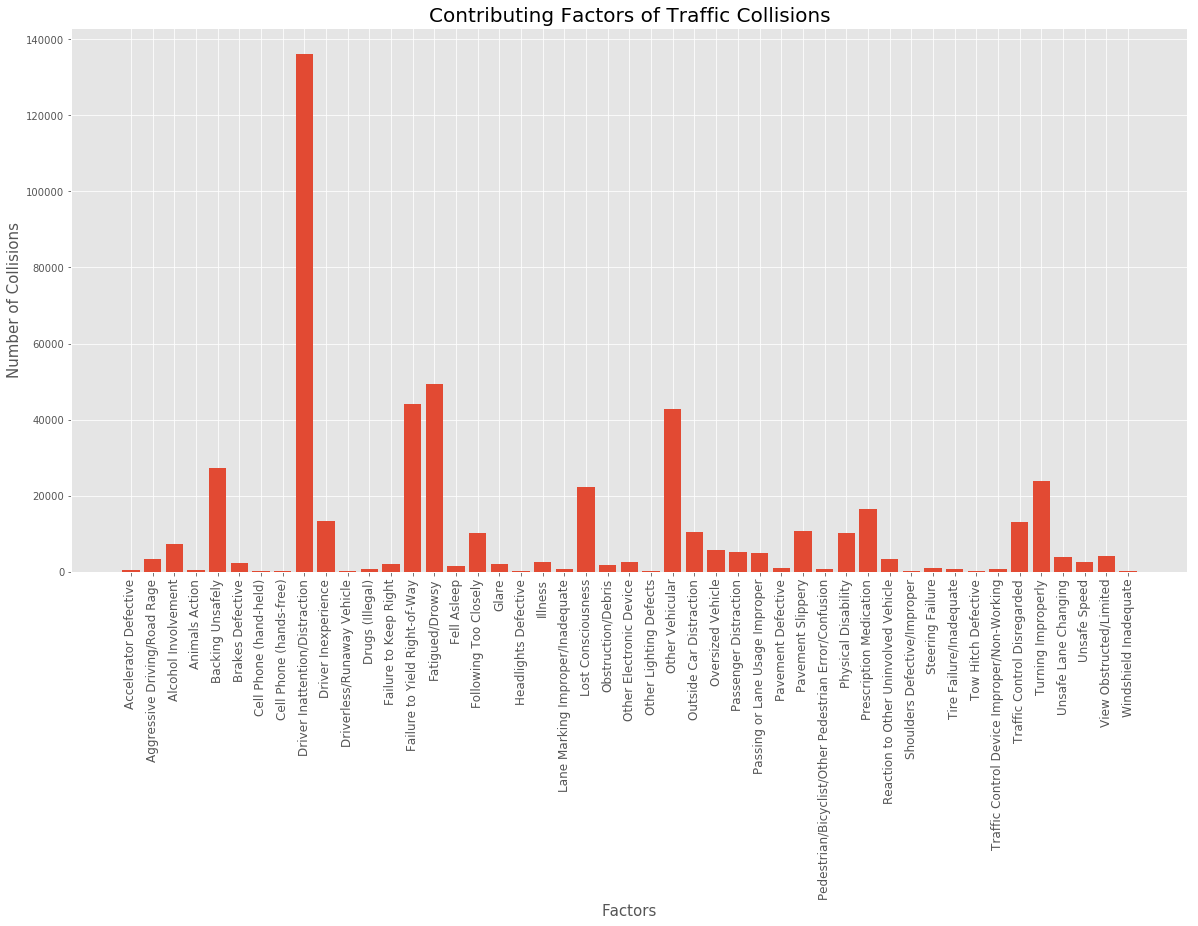

In [48]:
plt.bar(range(len(causes)), causes.values, align='center')
plt.xticks(range(len(causes)), causes.index.values, size='large', rotation='vertical')
plt.title('Contributing Factors of Traffic Collisions', size=20)
plt.xlabel('Factors', size=15)
plt.ylabel('Number of Collisions', size=15)
plt.show()

In [49]:
causes.nlargest(5)

Driver Inattention/Distraction    136217.0
Fatigued/Drowsy                    49446.0
Failure to Yield Right-of-Way      44176.0
Other Vehicular                    42792.0
Backing Unsafely                   27241.0
dtype: float64

In [50]:
top5 = causes.nlargest(5)

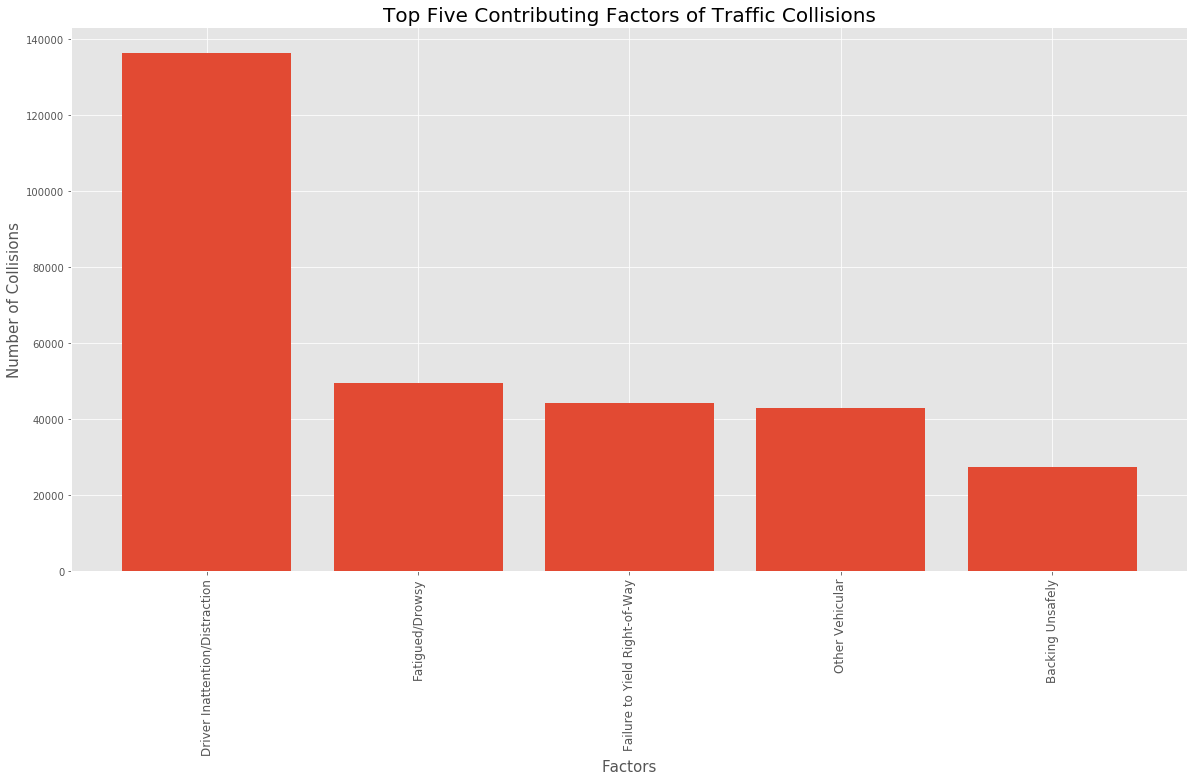

In [51]:
plt.bar(range(len(top5)), top5.values, align='center')
plt.xticks(range(len(top5)), top5.index.values, size='large', rotation='vertical')
plt.title('Top Five Contributing Factors of Traffic Collisions', size=20)
plt.xlabel('Factors', size=15)
plt.ylabel('Number of Collisions', size=15)
plt.show()